## 인코딩과 디코딩
시계열 데이터에서 인코딩과 디코딩에 대한 내용을 정리하기 위해서 오늘은 AE에 대한 내용을 확인해보자

decoding & encoding architecture
- encoding : 입력 샘플을 잠재공간, 인코딩에 의해 정의된 숨겨진 구조화된 값 집합에 매핑하는 함수

encoding - bottleneck hidden layer: latent space - decoding
- decoding : 잠재 공간의 요소를 사전 정의된 타겟 도메인으로 매핑하는 함수

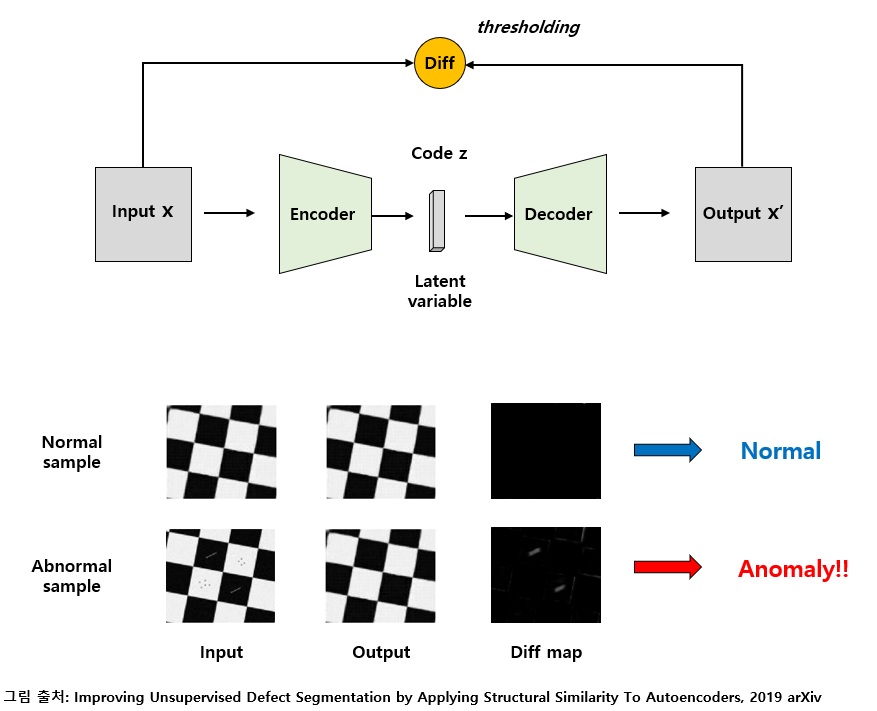

입력을 저차원 잠재공간으로 인코딩한 후 디코딩하여 복원하는 network이며 이미지를 입력받으면 인코더 모듈을 사용하여 잠재 벡터 공간으로 매핑하고 디코더 모듈을 사용하여 원본 이미지와 동일한 차원으로 복원하여 출력한다.

이걸 시계열에서 사용하면 어떨까?

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64

class AE(Model):
  def __init__(self, latent_dim):
    super(AE, self).__init__()
    self.latent_dim =  latent_dim
    self.encoder = tf.keras.Sequential([Flatten(), Dense(latent_dim, activation='relu')])
    self.decoder = tf.keras.Sequential([Dense(784, activation='sigmoid'), Reshape((28,28))])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
ae = AE(latent_dim)
ae.compile(optimizer='adam', loss=MeanSquaredError())

In [ ]:
ae.summary() # 이거 왜 안될까?

ValueError: ignored

In [ ]:
ae.fit(x_train, x_train,
       epochs=20,
       shuffle=True,
       validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0238 - val_loss: 0.0132
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [ ]:
encoded_imgs = ae.encoder(x_test).numpy()
decoded_imgs = ae.decoder(encoded_imgs).numpy()

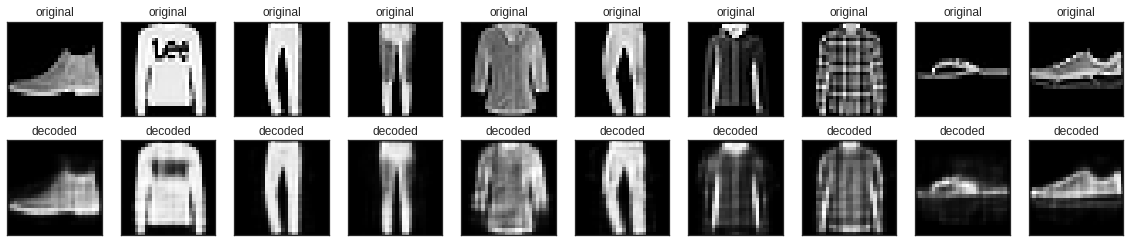

In [ ]:
n =10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.gray()
  plt.title('original')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title('decoded')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

모양과 포인트들이 비슷하게 학습되었다. 만약에 1000번 진행한다면? 더 정확해질까? 아니면 AE의 문제점일까?